In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#!unzip dataset.zip

In [3]:
# !wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
# !tar -xzvf "flower_photos.tgz" -C "." > xx
# print("Unzipped")

In [4]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')
print('model has',len(model.layers),'layers')
model.summary()

model has 177 layers
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                  

In [5]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (224,224))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')

print('classes',set(labels))

loaded 3670  samples
classes {'dandelion', 'tulips', 'roses', 'daisy', 'sunflowers'}


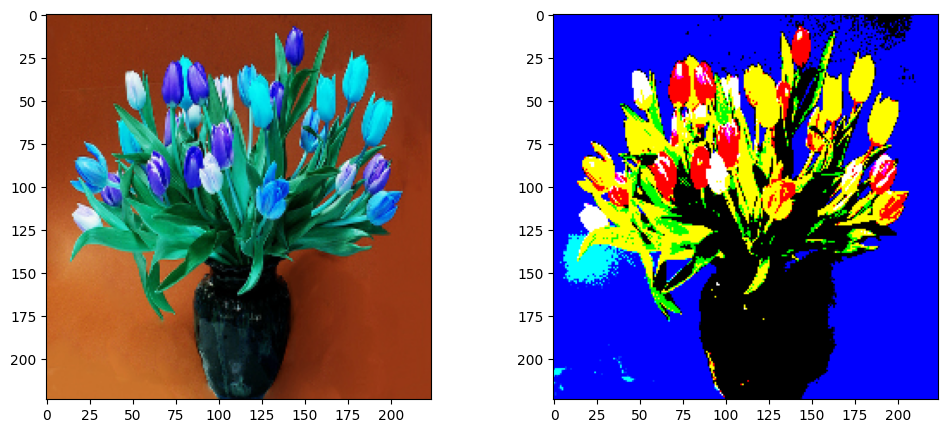

In [6]:
org_samples = samples[:]
samples = tf.keras.applications.resnet50.preprocess_input(samples)

## compare original and preprocessed
fig,(org_plot,prep_plot) = plt.subplots(1,2, figsize=(12, 5))
org_plot.imshow(org_samples[1])
prep_plot.imshow(samples[1])

In [7]:
predictions = model.predict(samples)

115/115 [==============================] - 753s 7s/step


In [8]:
top3 = tf.keras.applications.resnet50.decode_predictions(predictions, top = 3)
for i in range(len(samples)):
#    print(labels[i],'->',top3[i])

## Pretty version
   print("{} -> ({}:{:.2f}, {}:{:.2f}, {}:{:.2f})".format(labels[i],
                top3[i][0][1],top3[i][0][2],
                top3[i][1][1],top3[i][1][2],
                top3[i][2][1],top3[i][2][2]))

tulips -> (Old_English_sheepdog:0.24, giant_panda:0.10, Great_Pyrenees:0.09)
tulips -> (vase:0.62, pot:0.22, goblet:0.01)
tulips -> (abacus:0.18, artichoke:0.15, pot:0.11)
tulips -> (lakeside:0.17, water_bottle:0.16, parachute:0.06)
tulips -> (pinwheel:0.30, shower_curtain:0.23, loudspeaker:0.09)
tulips -> (greenhouse:0.47, fountain:0.11, coral_reef:0.07)
tulips -> (shower_curtain:0.49, pinwheel:0.11, dishwasher:0.10)
tulips -> (web_site:0.28, switch:0.17, screen:0.10)
tulips -> (hook:0.30, safety_pin:0.22, goblet:0.10)
tulips -> (umbrella:0.37, shower_curtain:0.25, pot:0.06)
tulips -> (radiator:0.19, daisy:0.13, fountain:0.06)
tulips -> (folding_chair:0.56, pot:0.11, barrel:0.07)
tulips -> (pinwheel:0.99, shovel:0.01, coral_fungus:0.00)
tulips -> (coral_fungus:0.72, sea_anemone:0.06, coral_reef:0.03)
tulips -> (paintbrush:0.35, coral_reef:0.21, broom:0.13)
tulips -> (pinwheel:0.78, picket_fence:0.07, daisy:0.05)
tulips -> (artichoke:0.95, banana:0.02, maraca:0.01)
tulips -> (obelisk:0

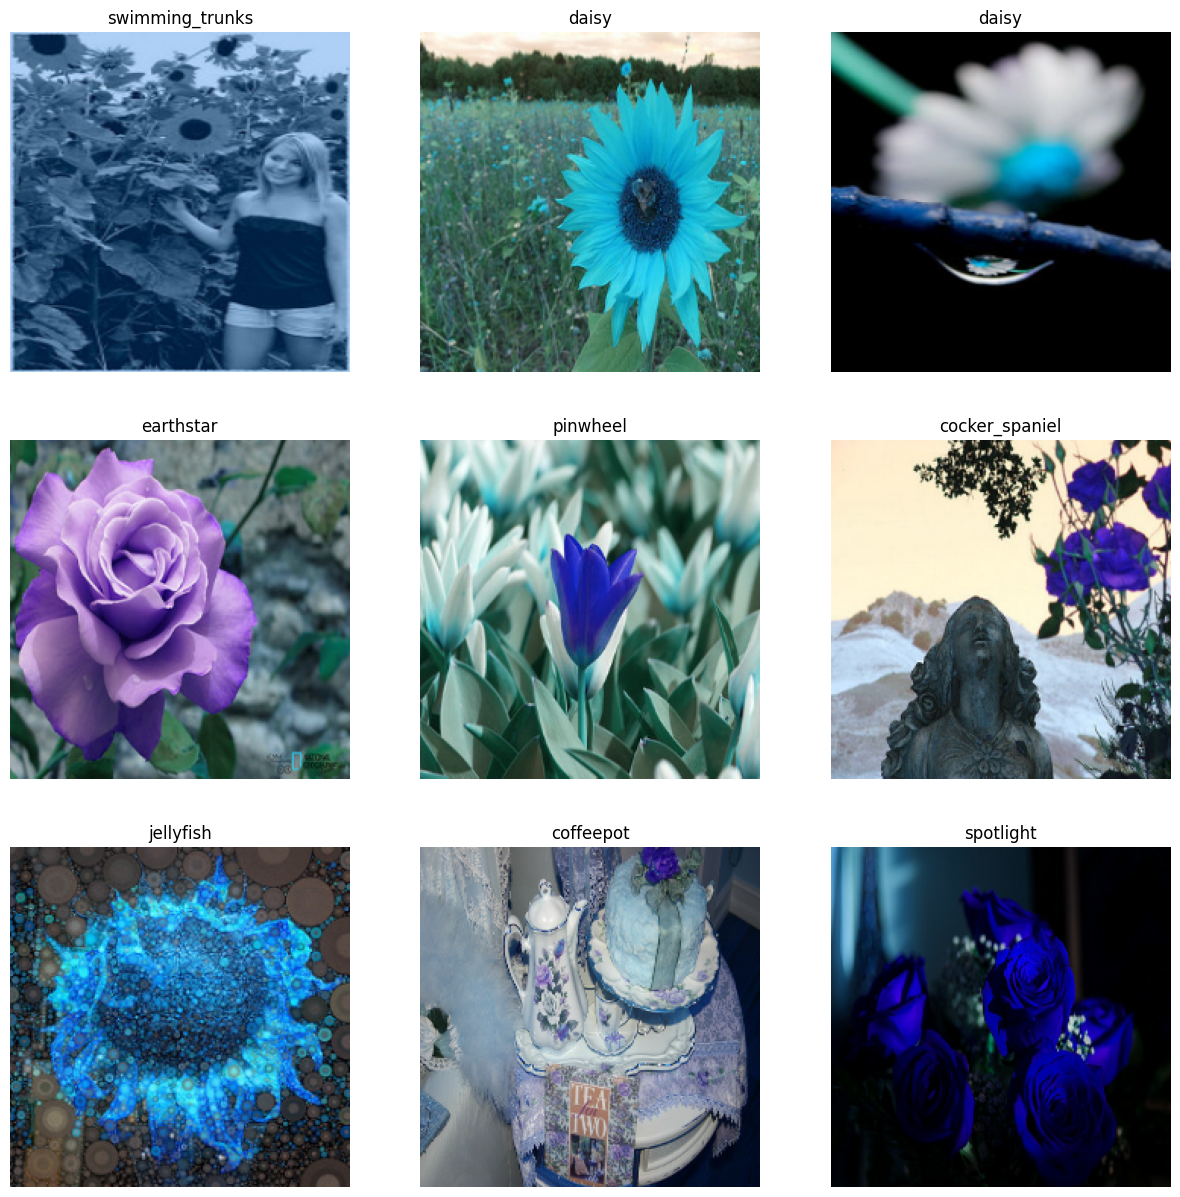

In [9]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
for i in range(9):
    n = random.randrange(len(samples))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(org_samples[n])
    plt.title(tf.keras.applications.resnet50.decode_predictions(predictions, top = 1)[n][0][1])
    plt.axis("off")

In [10]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)
print("Layers:",len(base_model.layers))
#base_model.summary()

Layers: 175


In [11]:
print("Full model:",len(model.layers),'layers')
for i,layer in enumerate(model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

print()
print("Base model:",len(base_model.layers),'layers')
for i,layer in enumerate(base_model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(base_model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

Full model: 177 layers
   0 input_1 <class 'keras.src.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
   172 conv5_block3_3_bn <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
   173 conv5_block3_add <class 'keras.src.layers.merging.add.Add'>
   174 conv5_block3_out <class 'keras.src.layers.core.activation.Activation'>
   175 avg_pool <class 'keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D'>
   176 predictions <class 'keras.src.layers.core.dense.Dense'>

Base model: 175 layers
   0 input_2 <class 'keras.src.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D'>
   2 conv1_conv <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
  ...
   171 conv5_bloc

In [12]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(768, activation = 'relu')(x)
x = tf.keras.layers.Dense(768, activation = 'relu')(x)
x = tf.keras.layers.Dense(768, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
last_layer = tf.keras.layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = last_layer)

print("Combined model:",len(model.layers),'layers')

Combined model: 181 layers


In [13]:
for layer in model.layers[:175]:
    layer.trainable = False

for layer in model.layers[175:]:
    layer.trainable = True


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (3670, 5)


In [15]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,
                test_size=0.5
                #random_state=42
                )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpt = ModelCheckpoint (filepath='resnet50_model.h5', save_best_only=True)
estopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

EPOCHS = 5
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, batch_size=10, validation_data=(testSamples,testLabels),
             callbacks = [estopping,checkpt])
print("Done")

(3670, 224, 224, 3)
Epoch 1/5
184/184 [==============================] - ETA: 0s - loss: 0.6338 - accuracy: 0.7706

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


184/184 [==============================] - 757s 4s/step - loss: 0.6338 - accuracy: 0.7706 - val_loss: 0.4602 - val_accuracy: 0.8540
Epoch 2/5
184/184 [==============================] - 732s 4s/step - loss: 0.3696 - accuracy: 0.8790 - val_loss: 0.3519 - val_accuracy: 0.8736
Epoch 3/5
184/184 [==============================] - 726s 4s/step - loss: 0.2485 - accuracy: 0.9215 - val_loss: 0.4353 - val_accuracy: 0.8703
Epoch 4/5
184/184 [==============================] - 726s 4s/step - loss: 0.1974 - accuracy: 0.9346 - val_loss: 0.3999 - val_accuracy: 0.8752
Epoch 5/5
184/184 [==============================] - 683s 4s/step - loss: 0.1608 - accuracy: 0.9526 - val_loss: 0.3760 - val_accuracy: 0.8752
Done


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("CNN Accuracy: {:.2f}".format(accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))

58/58 [==============================] - 364s 6s/step
[[276   9   0  11  11]
 [ 40 367   2  25   6]
 [  7   4 252   6  52]
 [  8   4   1 335  16]
 [  5   0  14   8 376]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       307
           1       0.96      0.83      0.89       440
           2       0.94      0.79      0.85       321
           3       0.87      0.92      0.89       364
           4       0.82      0.93      0.87       403

    accuracy                           0.88      1835
   macro avg       0.88      0.87      0.87      1835
weighted avg       0.88      0.88      0.88      1835

CNN Accuracy: 0.88
Cohen's Kappa: 0.84


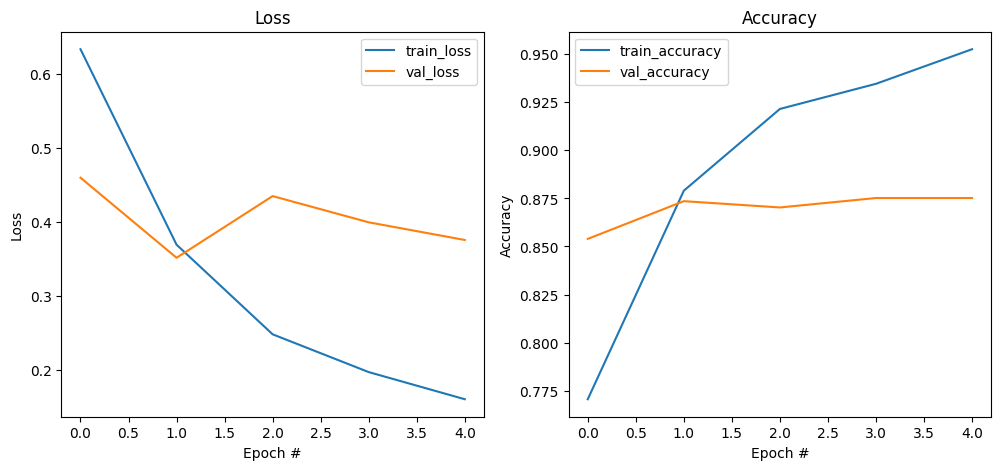

In [17]:
import matplotlib.pyplot as plt
N = np.arange(0, len(H.history["loss"]))

fig,(loss_plot,acc_plot) = plt.subplots(1,2, figsize=(12, 5))

loss_plot.plot(N, H.history["loss"], label="train_loss")
loss_plot.plot(N, H.history["val_loss"], label="val_loss")
loss_plot.set_title("Loss")
loss_plot.set(xlabel='Epoch #', ylabel='Loss')
loss_plot.legend()

acc_plot.plot(N, H.history["accuracy"], label="train_accuracy")
acc_plot.plot(N, H.history["val_accuracy"], label="val_accuracy")
acc_plot.set_title("Accuracy")
acc_plot.set(xlabel='Epoch #', ylabel='Accuracy')
acc_plot.legend()